# **Heart Disease Dataset Analysis:**

**Source:** __https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset__

**Attributes Information:**
1. age

2. sex

3. chest pain type (4 values)

4. resting blood pressure

5. serum cholestoral in mg/dl

6. fasting blood sugar > 120 mg/dl

7. resting electrocardiographic results (values 0,1,2)

8. maximum heart rate achieved

9. exercise induced angina

10. oldpeak = ST depression induced by exercise relative to rest

11. the slope of the peak exercise ST segment

12. number of major vessels (0-3) colored by flourosopy

13. Target Column: `thal`: 0 = normal; 1 = fixed defect; 2 = reversable defect

14. The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn as slr

In [2]:
data= pd.read_csv("C:/Users/MyMachine/Desktop/Mission-Project/00_DataSets/14_Heart_Disease_Dataset.csv")

In [3]:
data.shape

(1025, 14)

In [4]:
# Display top 5 rows of the dataset:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


-----
----

In [ ]:
# check the last 5 rows of the dataset:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


-----
-----

In [6]:
# Shape of our dataset:
print(data.shape)
print(F"Total Number of Rows: {data.shape[0]}")
print(F"Total number of Columns: {data.shape[1]}")

(1025, 14)
Total Number of Rows: 1025
Total number of Columns: 14


-----
----

In [7]:
# Get the Information about the dataset:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


----
----

In [8]:
# Check Null values in the dataset:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
data.isnull().any().sum()

np.int64(0)

----
----

In [10]:
# check for duplicate data and drop them:
data.duplicated().any()

np.True_

In [11]:
data.duplicated().sum()

np.int64(723)

In [12]:
data.shape

(1025, 14)

Out of `1025` samples, it shows `723` are duplicated. STRANGE!

In [13]:
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [14]:
# Drop duplicate data:
data.drop_duplicates(inplace=True)

In [15]:
data.shape

(302, 14)

Data is now cleaned but we lost so many observations.

-----
----

In [16]:
# Get overall statistics about the dataset:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
data.describe(include= "all")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


-----
-----

In [18]:
# Draw correlation Matrix:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


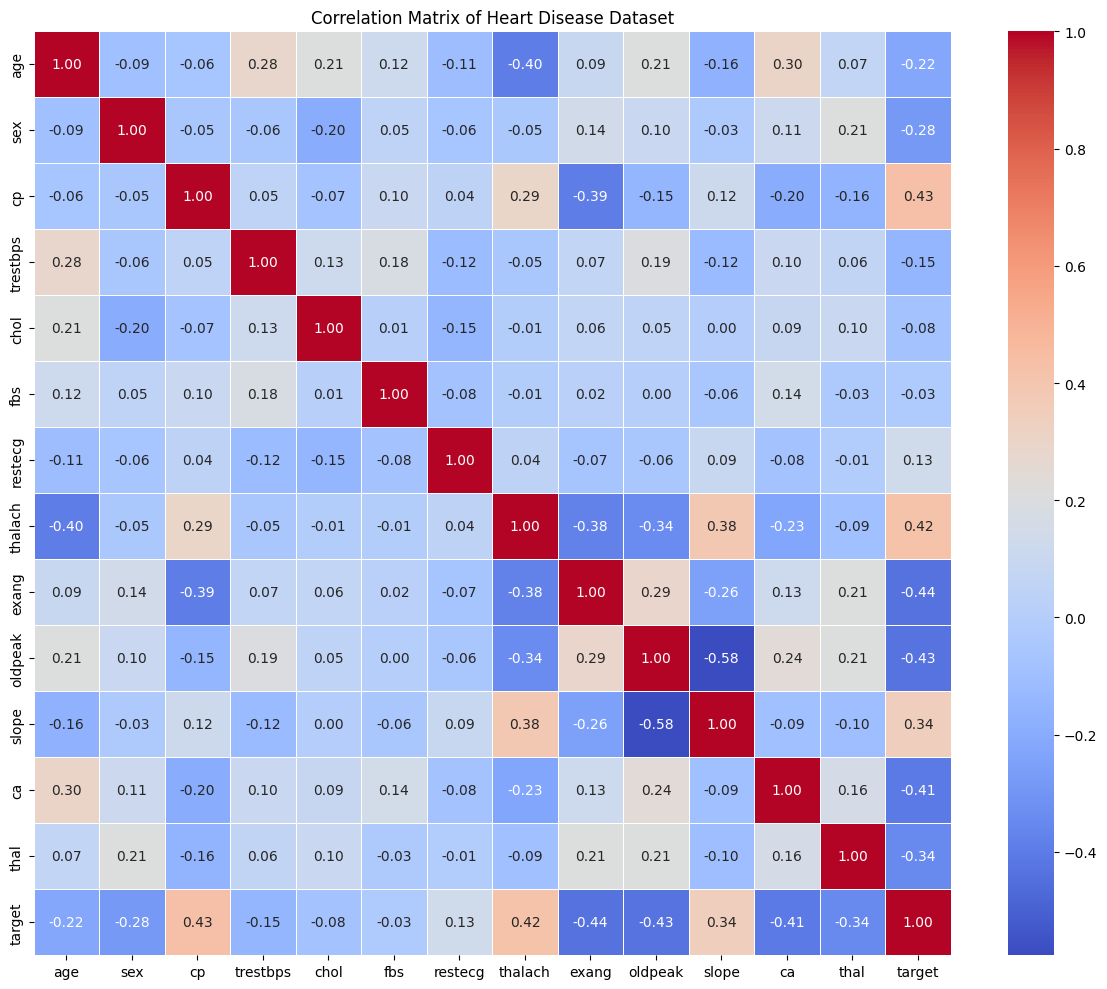

In [19]:
# Draw correlation matrix using sns.heatmap(data.corr()):

# Create a figure with a larger size
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(data.corr(), 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme (red for positive, blue for negative)
            fmt='.2f',  # Format correlation values to 2 decimal places
            linewidths=0.5)  # Add grid lines

# Add title
plt.title('Correlation Matrix of Heart Disease Dataset')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

-----
-----

In [20]:
# How many people have heart disease, and
#  how many do not have heart disease in 
# this dataset:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

This dataset contains various clinical and diagnostic features that are commonly used to predict the presence of heart disease in patients. Each attribute provides important information about different aspects of a patient's health condition and test results.

1. `age`: Age of the patient in years

2. `sex`: Gender of the patient
   - 1 = male
   - 0 = female

3. `cp`: Chest Pain Type
   - 0 = typical angina
   - 1 = atypical angina
   - 2 = non-anginal pain
   - 3 = asymptomatic

4. `trestbps`: Resting Blood Pressure (in mm Hg on admission to the hospital)

5. `chol`: Serum Cholesterol (in mg/dl)

6. `fbs`: Fasting Blood Sugar
   - 1 = true (if > 120 mg/dl)
   - 0 = false

7. `restecg`: Resting Electrocardiographic Results
   - 0 = normal
   - 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   - 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria

8. `thalach`: Maximum Heart Rate Achieved

9. `exang`: Exercise Induced Angina
   - 1 = yes
   - 0 = no

10. `oldpeak`: ST Depression (depression induced by exercise relative to rest)

11. `slope`: The Slope of the Peak Exercise ST Segment
    - 0 = upsloping
    - 1 = flat
    - 2 = downsloping

12. `ca`: Number of Major Vessels (0-3) Colored by Fluoroscopy

13. `thal`: Thalassemia
    - 0 = normal
    - 1 = fixed defect
    - 2 = reversable defect

14. `target`: Target Variable (Heart Disease)
    - 0 = no heart disease
    - 1 = presence of heart disease

In [21]:
data["target"].value_counts()

target
1    164
0    138
Name: count, dtype: int64

As, 1 indicates the presence of Disease, and 0 indicates the absence of Disease, 164 have heart disease.

<Axes: xlabel='target', ylabel='count'>

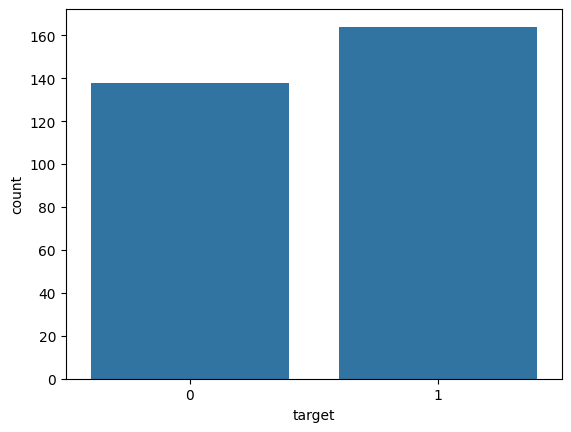

In [22]:
sns.countplot(data= data, x= "target")

-----
---

In [23]:
# Which sex has the most heaert disease (Male or Female):
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [24]:
data.groupby(by="sex")["target"].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          92
Name: count, dtype: int64

In [25]:
data.groupby(by="sex")["target"].value_counts().reset_index()

,sex,target,count
0,0,1,72
1,0,0,24
2,1,0,114
3,1,1,92


---
---

In [26]:
# Counts of male and female:
data["sex"].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

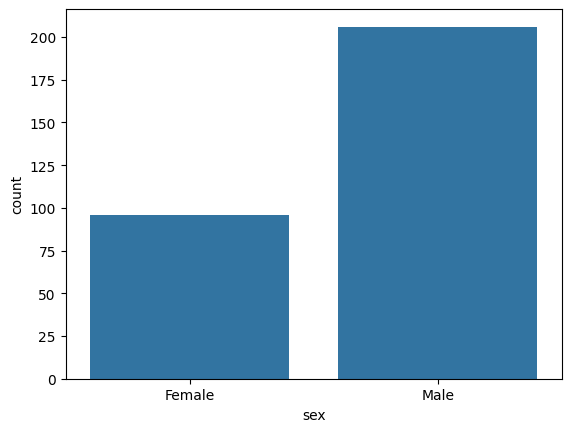

In [27]:
sns.countplot(data= data, x= "sex")
plt.xticks([0,1], ['Female', 'Male'])
plt.show()

---
---

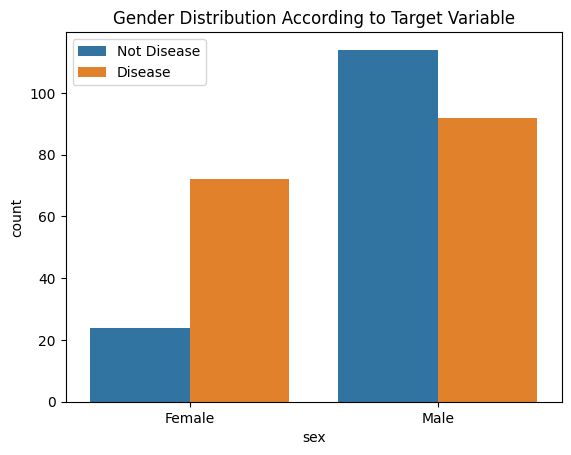

In [28]:
# Find Gender distribution according to 
# the target variable:
sns.countplot(x= "sex", hue= "target", data= data)
plt.title('Gender Distribution According to Target Variable')
plt.xticks([0,1], ['Female', 'Male'])
plt.legend(loc='upper left',labels= ['Not Disease', 'Disease'])

In [29]:
data.groupby(by= "target")["sex"].value_counts()

target  sex
0       1      114
        0       24
1       1       92
        0       72
Name: count, dtype: int64

In [30]:
count1= data.groupby(by= "target")["sex"].value_counts().reset_index()

In [31]:
count1

,target,sex,count
0,0,1,114
1,0,0,24
2,1,1,92
3,1,0,72


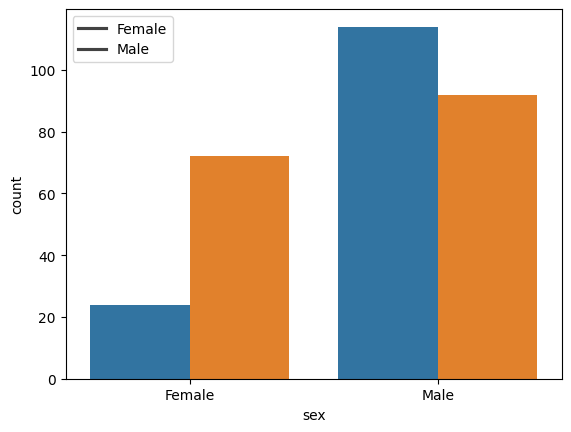

In [32]:
sns.barplot(data= count1, hue= "target", x='sex', y= "count" )
plt.xticks([0,1], ['Female', 'Male'])
plt.legend(loc= 'upper left', labels= ['Female', 'Male'])

----
---

In [33]:
# Check the Age distribution in the dataset:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [34]:
data["age"]

0      52
1      53
2      70
3      61
4      62
       ..
723    68
733    44
739    52
843    59
878    54
Name: age, Length: 302, dtype: int64

<Axes: ylabel='age'>

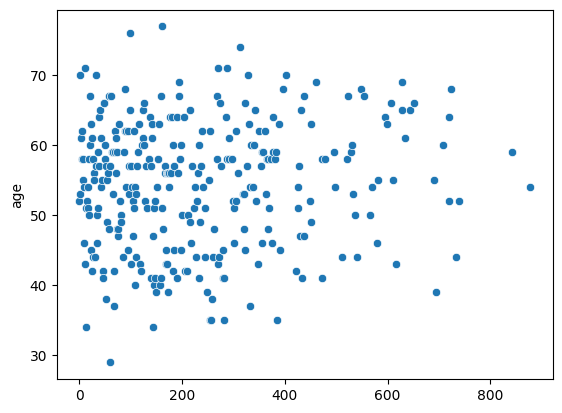

In [35]:
sns.scatterplot(data["age"])

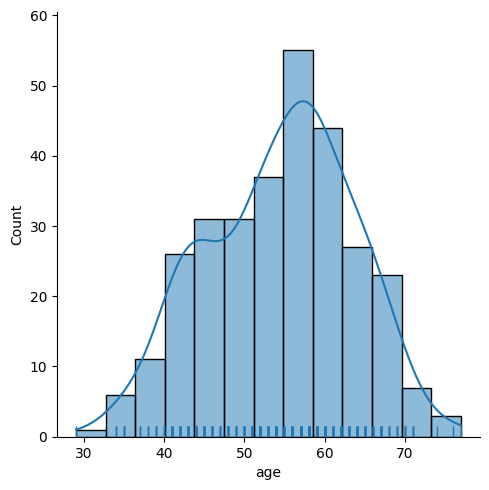

In [36]:
sns.displot(data["age"], rug= True, kde=True)

-----
-----

In [37]:
# Check for the chest pain type:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

The third column `cp` indicates the `Chest Pain`. 

Text(0.5, 0, 'Chest Pain')

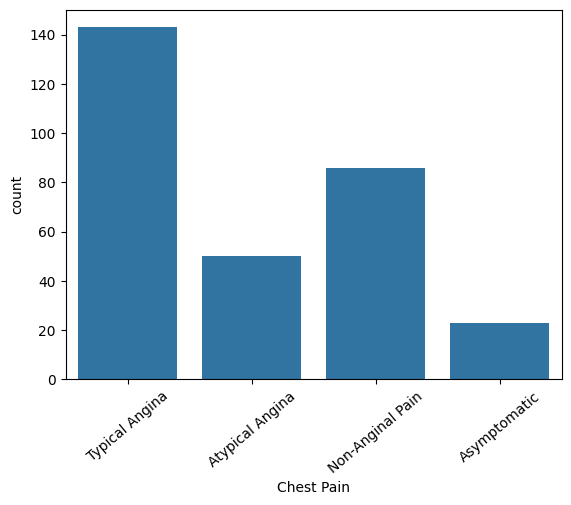

In [38]:
sns.countplot(data= data, x= "cp")
plt.xticks([0,1,2,3], ["Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic"],rotation= 40)
plt.xlabel("Chest Pain")

In [39]:
data["cp"].value_counts()

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64

In [40]:
cp= data["cp"].value_counts().reset_index()

In [41]:
cp

,cp,count
0,0,143
1,2,86
2,1,50
3,3,23


Text(0.5, 0, 'Chest Pain')

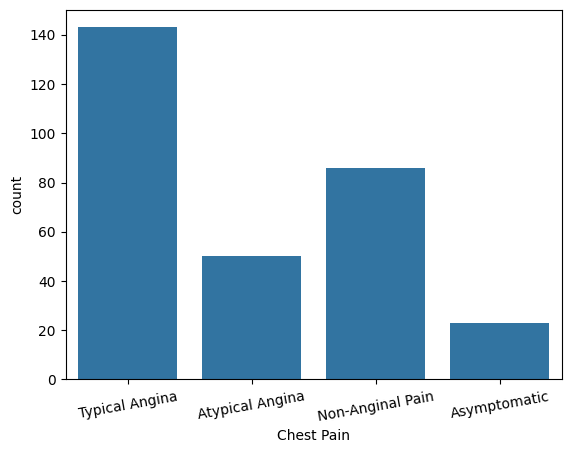

In [60]:
sns.barplot(data= cp, x= 'cp', y= "count")
plt.xticks([0,1,2,3], ["Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic"],rotation= 10)
plt.xlabel("Chest Pain")

----
----

In [43]:
# Show the chest pain distribution as per 
# the target variable:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [45]:
data["cp"].value_counts()

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64

In [46]:
data["target"].value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [62]:
pd.DataFrame(data.groupby(by= "target")["cp"].value_counts())

count
target cp       
0      0     104
       2      18
       1       9
       3       7
1      2      68
       1      41
       0      39
       3      16

In [64]:
pd.DataFrame(data.groupby(by= "target")["cp"].value_counts()).reset_index()

,target,cp,count
0,0,0,104
1,0,2,18
2,0,1,9
3,0,3,7
4,1,2,68
5,1,1,41
6,1,0,39
7,1,3,16


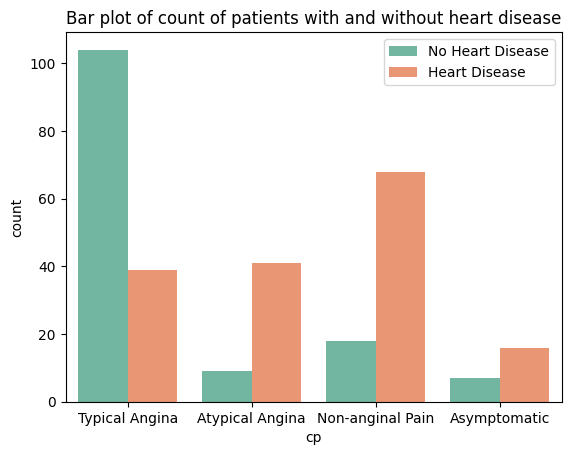

In [75]:
sns.countplot(data=data, x="cp", hue="target", palette="Set2")
plt.title('Bar plot of count of patients with and without heart disease')
plt.xticks([0,1,2,3], ["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"])
plt.legend(["No Heart Disease", "Heart Disease"])
plt.show()

In [55]:
all= data.groupby(by= "target")["cp"].value_counts().reset_index()

In [56]:
all

,target,cp,count
0,0,0,104
1,0,2,18
2,0,1,9
3,0,3,7
4,1,2,68
5,1,1,41
6,1,0,39
7,1,3,16


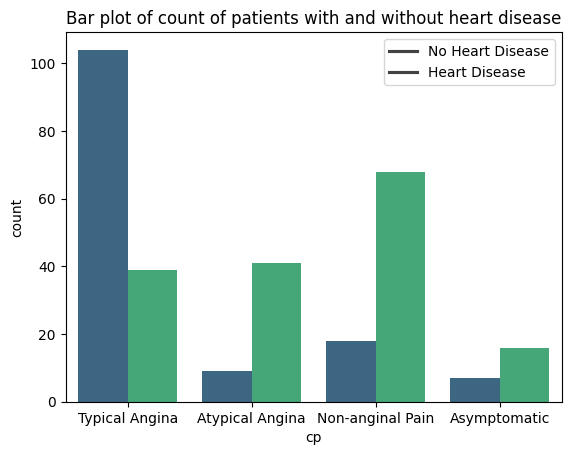

In [74]:
sns.barplot(data= all, x="cp", y= 'count', hue= 'target', palette='viridis')
plt.title('Bar plot of count of patients with and without heart disease')
plt.xticks([0,1,2,3], ["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"])
plt.legend(["No Heart Disease", "Heart Disease"])
plt.show()

---
----

In [69]:
# Show Fasting blood sugar distribution 
# according to the target value:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

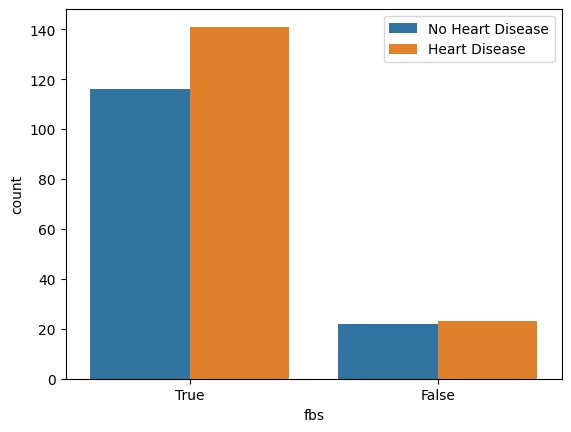

In [73]:
sns.countplot(data= data, x= 'fbs', hue='target' )
plt.xticks([0,1], ["True", "False"])
plt.legend(["No Heart Disease", "Heart Disease"])
plt.show()

In [78]:
# OR; 
# Show Fasting blood sugar distribution 
# according to the target value:
data1= data.groupby(by= 'target')["fbs"].value_counts().reset_index()
data1

,target,fbs,count
0,0,0,116
1,0,1,22
2,1,0,141
3,1,1,23


<Axes: xlabel='fbs', ylabel='count'>

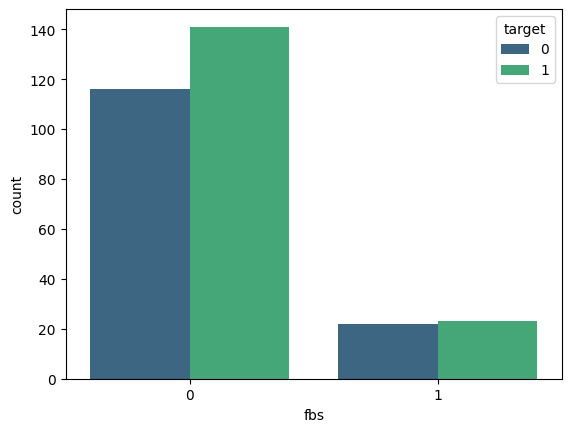

In [79]:
sns.barplot(data= data1, hue= "target", x= 'fbs', y= "count", palette= "viridis")

-----
-----

In [80]:
# Check for the resting blood pressure distribution:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

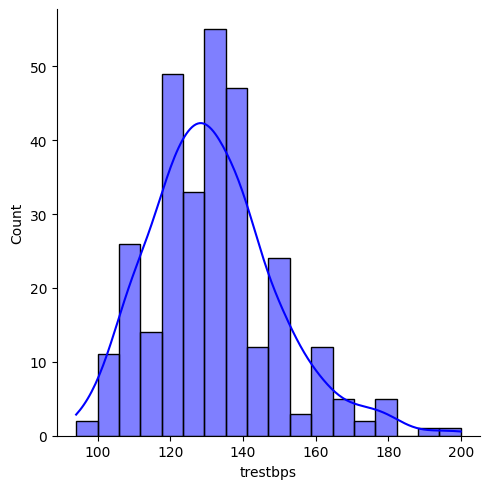

In [91]:
sns.displot(x= data["trestbps"], kde=True, color="blue")

-----
----

In [95]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [97]:
data["sex"].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

Text(0, 0.5, 'Density')

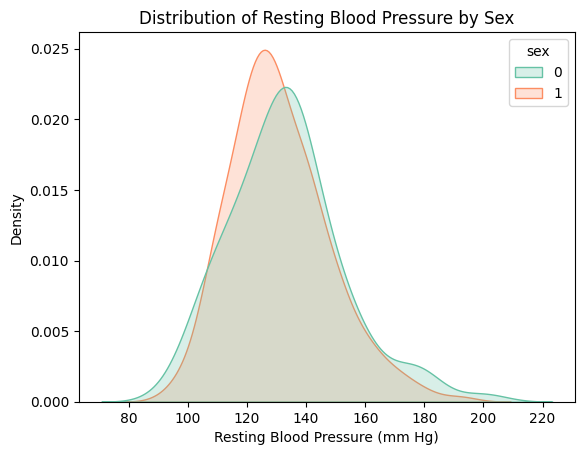

In [101]:
# Compare reating blood pressure as 
# per the Sex column:
# Using kdeplot for smooth density curves
sns.kdeplot(data=data, x='trestbps', hue='sex', common_norm=False, palette='Set2', fill= True)
plt.title('Distribution of Resting Blood Pressure by Sex')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Density')



Text(0, 0.5, 'Count')

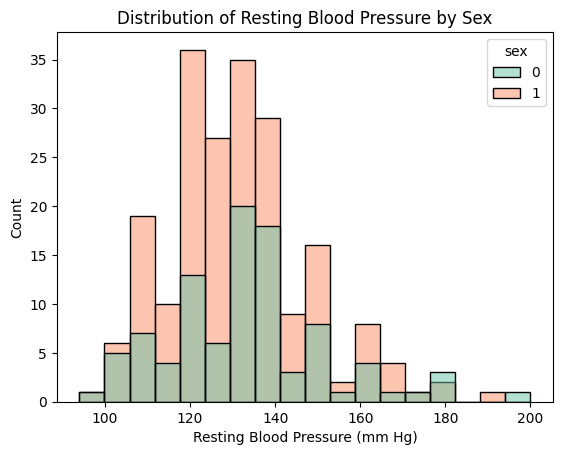

In [100]:
# Or using histplot for actual histograms
sns.histplot(data=data, x='trestbps', hue='sex', multiple="layer", alpha=0.5, palette='Set2')
plt.title('Distribution of Resting Blood Pressure by Sex')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Count')

------
---

In [102]:
# Show the distribution of Serum cholestrol:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

C:\Users\MyMachine\AppData\Local\Temp\ipykernel_14592\2850811025.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data= data, x= "chol",palette= "Blues_d", kde= True)


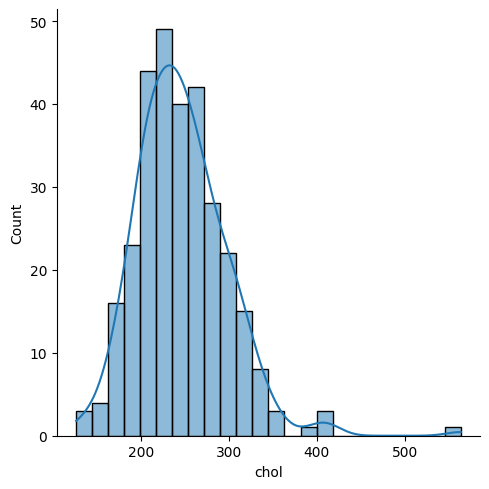

In [103]:
sns.displot(data= data, x= "chol",palette= "Blues_d", kde= True)

<Axes: xlabel='chol', ylabel='Count'>

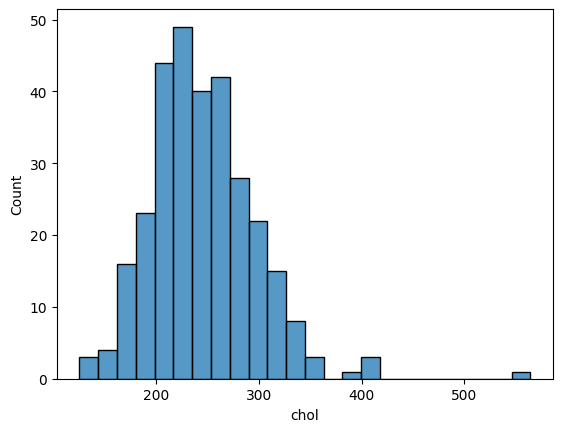

In [108]:
sns.histplot(x= data["chol"])

-----
----

In [ ]:
# Plot continuous variables:

In [109]:
cate_val= []
cont_val= []

In [110]:
for column in data.columns:
    if data[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [111]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [112]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

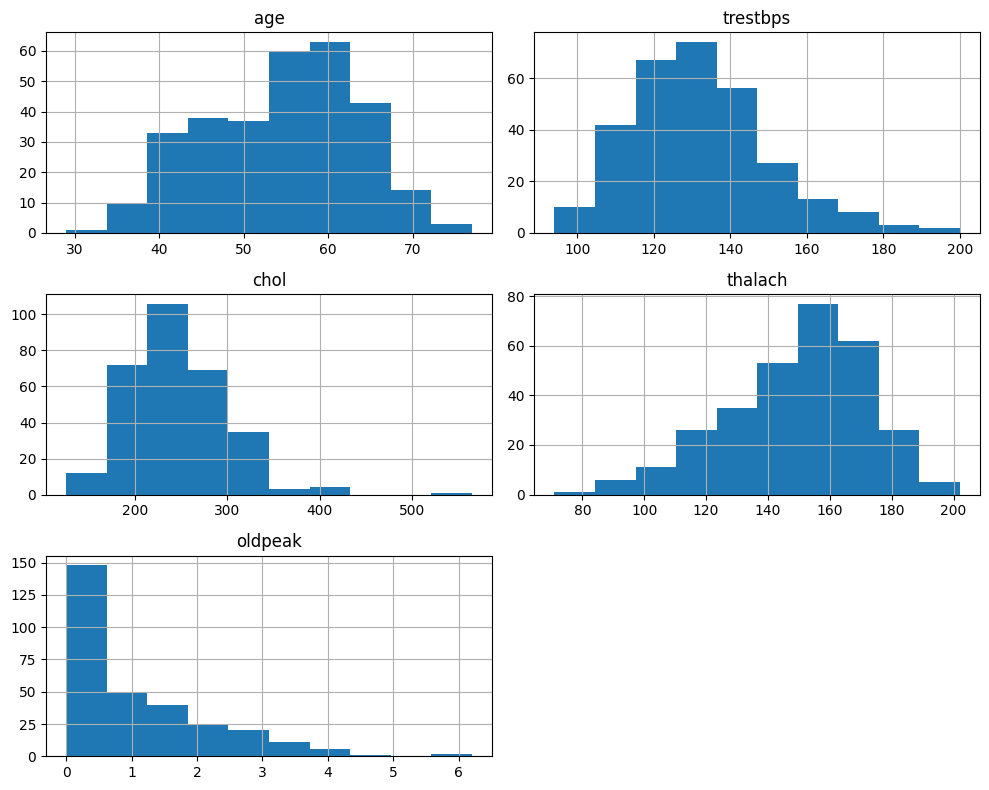

In [122]:
data.hist(cont_val, figsize= (10, 8))
plt.tight_layout()
plt.show()